In [1]:
import numpy as np
import math
import torch
from torch import nn

import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
from livelossplot import PlotLosses
from Inference.GeNVI_method import GeNVariationalInference, GeNetEns

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [24]:
from Experiments.foong import Setup
setup=Setup(device, layerwidth=20)

# Target density #

In [25]:
logtarget= setup.logposterior
param_count=setup.param_count
model=setup._model


# AE-Variational Distribution #

In [26]:
activation = nn.Tanh()#nn.ReLU()
init_b = .001

GeN = GeNetEns(1, 1, 50, param_count, activation, 0.2, init_b, device)

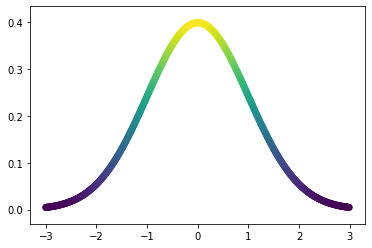

In [41]:
from Tools import logmvn01pdf
%matplotlib inline

X=torch.arange(-3.,3., 0.01).unsqueeze(1)
colors=logmvn01pdf(X,device).exp()

plt.scatter(X,colors, c=colors)


In [ ]:
from matplotlib.colors import Normalize
import matplotlib.cm as cm



%matplotlib inline

def makePlot(self, theta, colors,device=device):
    def get_linewidth(linewidth, axis):
        fig = axis.get_figure()
        ppi = 72  # matplolib points per inches
        length = fig.bbox_inches.height * axis.get_position().height
        value_range = np.diff(axis.get_ylim())[0]
        return linewidth * ppi * length / value_range
    nb_samples_plot=theta.shape[0]
    x_lin = torch.linspace(-2.0, 2.0).unsqueeze(1)
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 10)
    plt.xlim(-2, 2) 
    plt.ylim(-4, 6)
    plt.grid(True, which='major', linewidth=0.5)
    my_lw=get_linewidth(0.2,ax)
    alpha = (.9 / torch.tensor(float(nb_samples_plot)).sqrt()).clamp(0.05, 1.)
    theta=theta.detach().to(device)
    norm=Normalize(vmin=colors.min(), vmax=colors.max())
    cmap = cm.viridis
    m = cm.ScalarMappable(norm=norm, cmap=cmap)
    for i in range(theta.shape[0]):
        y_pred = self._normalized_prediction(x_lin, theta[i,:].unsqueeze(0), device)
        color=m.to_rgba(colors[i].numpy())
        plt.plot(x_lin.detach().cpu().numpy(), y_pred.squeeze(0).detach().cpu().numpy(), alpha=0.1, linewidth=1.0, color=color,zorder=3)
    plt.scatter(self._X_train.cpu(), self._y_train.cpu(), marker='.',color='black',zorder=4)
    return fig

Z=GeN.components[0].hnet(X).detach()
fig=makePlot(setup,Z,colors,device)


In [43]:
%matplotlib inline
from tempfile import TemporaryDirectory





#sample, = ax.scatter([],[],color='red',alpha=0.07)
#fig.canvas.draw()
    
    
'''
def show(GeN,n,alpha=0.07):
    Z=GeN(n).detach().clone().cpu()
    plt.pcolormesh(grid_x.numpy(),grid_y.numpy(),p.exp().numpy())
    plt.scatter(Z[:,0],Z[:,1],color='red',alpha=alpha) 
    plt.draw()
    plt.show()
''' 

def show(GeN,n):
    return
    #Z=GeN.components[0].hnet(X).detach()
    #fig=makePlot(setup,Z,colors,device)
    #plt.show()
    

with TemporaryDirectory() as temp_dir:
    optimizer = GeNVariationalInference(logtarget,
		                                    0, 100, 1000, 50, 100,
		                                    10000, .01, .000001, 100, .5,
		                                    device, True, temp_dir, save_best=True)
    best_epoch, scores=optimizer.run(GeN,show)
print(best_epoch)

Epoch [0/10000], Loss: -108.17398834228516, Entropy 24.7329044342041, Learning Rate: 0.01
Epoch [1/10000], Loss: 80835.7265625, Entropy 23.868619918823242, Learning Rate: 0.01
Epoch [2/10000], Loss: 8117.85009765625, Entropy 25.196542739868164, Learning Rate: 0.01
Epoch [3/10000], Loss: 23337.982421875, Entropy 22.347288131713867, Learning Rate: 0.01
Epoch [4/10000], Loss: 28435.90625, Entropy 21.762365341186523, Learning Rate: 0.01
Epoch [5/10000], Loss: 22660.052734375, Entropy 20.253620147705078, Learning Rate: 0.01
Epoch [6/10000], Loss: 10010.1357421875, Entropy 16.454435348510742, Learning Rate: 0.01
Epoch [7/10000], Loss: 6833.19384765625, Entropy 15.783649444580078, Learning Rate: 0.01
Epoch [8/10000], Loss: 6105.72021484375, Entropy 12.904814720153809, Learning Rate: 0.01
Epoch [9/10000], Loss: 7970.5986328125, Entropy 14.092970848083496, Learning Rate: 0.01
Epoch [10/10000], Loss: 7847.0927734375, Entropy 14.788936614990234, Learning Rate: 0.01
Epoch [11/10000], Loss: 8931.32

Epoch [92/10000], Loss: -48.47667694091797, Entropy 5.720949172973633, Learning Rate: 0.01
Epoch [93/10000], Loss: -47.97933578491211, Entropy 5.55233097076416, Learning Rate: 0.01
Epoch [94/10000], Loss: -51.663307189941406, Entropy 6.7058234214782715, Learning Rate: 0.01
Epoch [95/10000], Loss: -47.29851150512695, Entropy 5.924980640411377, Learning Rate: 0.01
Epoch [96/10000], Loss: -51.30000305175781, Entropy 7.107509136199951, Learning Rate: 0.01
Epoch [97/10000], Loss: -49.357017517089844, Entropy 6.473627090454102, Learning Rate: 0.01
Epoch [98/10000], Loss: -50.896881103515625, Entropy 5.562631607055664, Learning Rate: 0.01
Epoch [99/10000], Loss: -51.90899658203125, Entropy 5.392339706420898, Learning Rate: 0.01
Epoch [100/10000], Loss: -51.691646575927734, Entropy 6.857794284820557, Learning Rate: 0.01
Epoch [101/10000], Loss: -52.51718521118164, Entropy 5.918186664581299, Learning Rate: 0.01
Epoch [102/10000], Loss: -54.508277893066406, Entropy 5.225046157836914, Learning Ra

KeyboardInterrupt: 

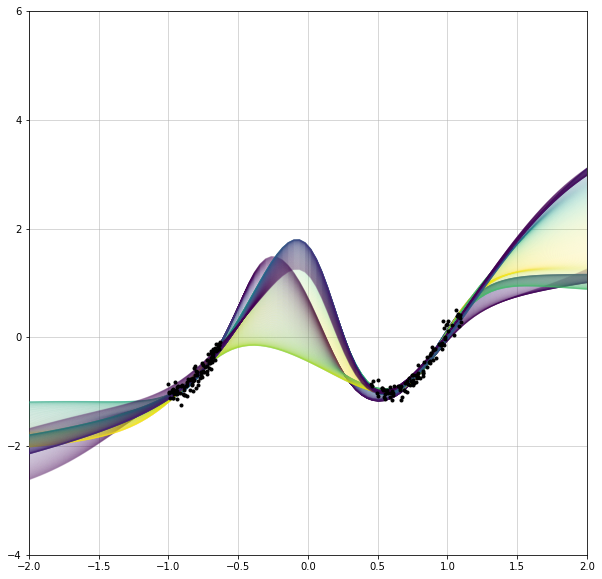

In [44]:
Z=GeN.components[0].hnet(X).detach()
fig=makePlot(setup,Z,colors,device)


In [46]:

Z = GeN(1000).detach()


In [58]:
from sklearn.manifold import TSNE
myTSNE=TSNE(n_components=2,init='pca',perplexity=50)
X_embedded =myTSNE.fit_transform(Z)
print(myTSNE.kl_divergence_)
X_embedded.shape

0.15273454785346985


(1000, 2)

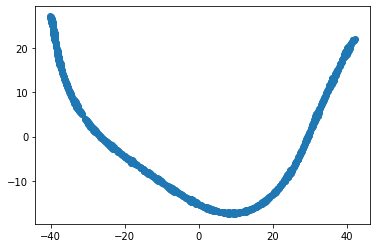

In [59]:
%matplotlib inline
plt.scatter(X_embedded[:,0],X_embedded[:,1])

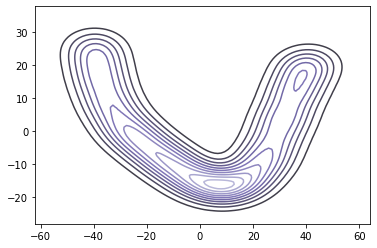

In [60]:
%matplotlib inline 
import seaborn as sns


sns.kdeplot(X_embedded[:,0],X_embedded[:,1], cmap="Purples_d")


In [56]:
from sklearn.manifold import MDS
Z=GeN(1000).detach()
embedding = MDS(n_components=2)
X_transformed = embedding.fit_transform(Z)
X_transformed.shape


(1000, 2)

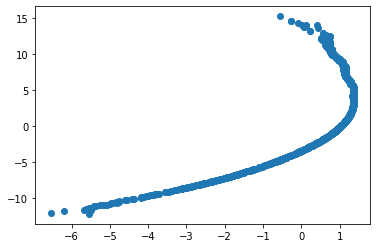

In [57]:
%matplotlib inline
plt.scatter(X_transformed[:,0],X_transformed[:,1])